In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
data = np.load('./mnist_train_small.npy')

In [25]:
X = data[:, 1:]
y = data[:, 0]

In [26]:
X.shape , y.shape

((19999, 784), (19999,))

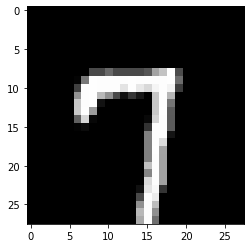

In [27]:
plt.imshow(X[564].reshape(28,28), cmap='gray')

In [28]:
y[564]

7

In [19]:
train_test_split?

In [29]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)


In [30]:
X_train.shape, y_train.shape


((13399, 784), (13399,))

In [31]:
X_test.shape, y_test.shape

((6600, 784), (6600,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier()

In [17]:
# use fit to train the model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
#use predict to test
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [19]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

## Custom KNN

In [45]:
class CustomKNN:
  # constructor
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors;
  # training function
  def fit(self, X, y):
    self._X = X.astype(np.int64);
    self._y = y;

  # predict point
  # given a single point, tell me which class it belongs to
  def predict_point(self, point):
    # storing the dis of given 'point' from each point in training data
    list_dist = [];

    # these points are from my training data
    for x_point, y_point in zip(self._X, self._y):
      dist_point = ((point - x_point) ** 2).sum();
      list_dist.append([dist_point, y_point]);

    ## sorting the list according to the distance
    sorted_dist = sorted(list_dist);
    top_k = sorted_dist[:self.n_neighbors]

    # taking the count 
    items, count = np.unique(np.array(top_k)[:, 1], return_counts=True);
    ans = items[np.argmax(count)]
    return ans

  # predict
  # give me answer for each number in the array
  def predict(self, X):
    results = []
    for point in X.astype(np.int64):
      results.append(self.predict_point(point));
    
    return np.array(results, dtype=int);
    
  # score to measure my accuracy
  def score(self, X, y):
    return sum(self.predict(X) == y)/len(y);

In [40]:
model2 = CustomKNN()

In [41]:
model2.fit(X_train, y_train)

In [42]:
model2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [43]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [44]:
model2.score(X_test[:100], y_test[:100])

0.95

GITHUB REPO BY KUNAL
https://github.com/codeforcauseorg/ML-Bootcamp-July/blob/master/knn/KNN.ipynb